In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Question 1) Please read the "sales.csv" file as a DataFrame object named as "sales_df". Print the length and the first 5 tuples of the DataFrame. (5 points)

In [2]:
#codes
sales_df = pd.read_csv('sales.csv')
print(len(sales_df))
sales_df.head(5)

8523


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Question2) Split the dataset into the dependent (name it 'x') and independent variables (name it 'y') which are response variable( 'Item_Outlet_Sales') and predictors. Print their shape info and top 10 records of them. (5 points)

In [3]:
#codes
x = sales_df.drop(columns = "Item_Outlet_Sales" , axis = 1)
y = sales_df[["Item_Outlet_Sales"]]
print(x.shape)
display(x.head(10))
print(y.shape)
display(y.head(10))


(8523, 45)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


(8523, 1)


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
5,556.6088
6,343.5528
7,4022.7636
8,1076.5986
9,4710.5350


Question3) Normalization step: Rescale dependent variables (x variable) into the range [0,1] by applying  MinMaxScaler to normalize. Lastly convert into dataframe (10 points)

In [4]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
#codes
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=[sales_df.loc[:,sales_df.columns != 'Item_Outlet_Sales']])
x.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.486885,0.000000,0.085361,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.639344,0.038799,0.111923,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.000000,0.388165,0.324587,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.758782,0.050815,0.278791,0.708333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.899297,0.287613,0.664399,0.916667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Question 4) Split data into train and test sets. Use the split ratio as 80:20 and set the 'random_state' to an integer value. (10 points)

In [6]:
# Importing Train test split
from sklearn.model_selection import train_test_split

In [7]:
#codes
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 45)
(1705, 45)
(6818, 1)
(1705, 1)


Question 5) c, then fit kNN regression model to train data. Finally, make prediction and calculate mean squared error (MSE). Print MSE value. (15 points)

In [8]:
#importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [9]:
#codes
knn = KNN(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
mserror = mse(y_test,y_pred) 
print(mserror)

1790835.1426143483


Question 6) Create Elbow function which does the same operation in the previous question for each k instance in the range [1-40] by using Manhattan and Euclidean distance metrics separately in order to determine the optimal value of k. (25 points)

In [10]:
#codes

def Elbow(arg, elist, mlist):
    
    Euclidean = KNN(n_neighbors = arg, p=2, metric="euclidean")
    Manhattan = KNN(n_neighbors = arg, p=1, metric = "manhattan")
    
    Euclidean.fit(x_train, y_train)
    Manhattan.fit(x_train, y_train)
    
    EuclideanP = Euclidean.predict(x_test)
    ManhattanP = Manhattan.predict(x_test)
    
    EuclideanError = mse(y_test, EuclideanP)
    ManhattanError = mse(y_test, ManhattanP)
    
    elist.append(EuclideanError)
    mlist.append(ManhattanError)
    print(arg," Euclidean ",EuclideanError)
    print(arg," Manhattan ",ManhattanError)

Call the defined function for defined range of k

In [11]:
#codes
EuclideanErrorList = []
ManhattanErrorList = []
for i in range(1,41):
    Elbow(i,EuclideanErrorList,ManhattanErrorList)

1  Euclidean  2580788.569481642
1  Manhattan  2718732.3384558363
2  Euclidean  2002355.6593177617
2  Manhattan  2038160.718367595
3  Euclidean  1790835.1426143483
3  Manhattan  1801930.9523505706
4  Euclidean  1693787.0840163894
4  Manhattan  1679718.2719172193
5  Euclidean  1627669.3939864002
5  Manhattan  1612327.020780776
6  Euclidean  1573959.2378046792
6  Manhattan  1577982.8982004875
7  Euclidean  1560249.131080644
7  Manhattan  1560658.436872422
8  Euclidean  1538653.0118604705
8  Manhattan  1551344.342791123
9  Euclidean  1527023.832383918
9  Manhattan  1551332.4177884955
10  Euclidean  1533627.7367054534
10  Manhattan  1558307.240378575
11  Euclidean  1538503.8506280594
11  Manhattan  1566084.175528615
12  Euclidean  1544621.2345625674
12  Manhattan  1574617.9958598597
13  Euclidean  1560371.386699611
13  Manhattan  1574080.2496181694
14  Euclidean  1562031.2316886005
14  Manhattan  1586296.2604442402
15  Euclidean  1575510.276417339
15  Manhattan  1596491.8303129147
16  Eucli

Question 7) Visualize the test mean squared error (MSE) results of Manhattan and Euclidean distance metric by plotting. Two curves should be displayed in the same graph. (15 points)

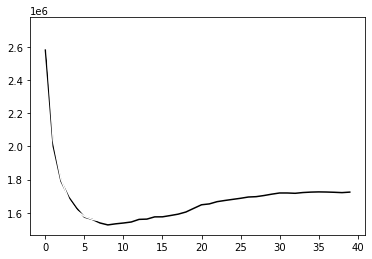

In [13]:
#codes
fig, ax = plt.subplots()
ax.plot(EuclideanErrorList, label="Euclidean MSE", color = "black")
ax.plot(ManhattanErrorList, label = "Manhattan MSE", color = "white")

plt.show()

Question 8) According to obtained result, decide distance metric and optimal k value, and then use them for your kNN model, and make a prediction. Print MSE value for chosen k value. (15 points)

In [13]:
#codes
# I decide euclidean distance metric and k = 9 
k = 9 
myKNN = KNN(n_neighbors=k).fit(x_train, y_train)
myKNN = myKNN.predict(x_test)
myError = mse(y_test,myKNN)
print(myError)

1527023.832383918
